# Taiwanese Banking Act 72-2 Prediction

<img src="News Screenshot.png" width="600" height="400">

## The Banking Act of Taiwan 72-2
<img src="Banking Law 72-2.png" width="800" height="700">

## Raw Data
<img src="Stats Screenshot.png" width="800" height="200">

In [1091]:
import pandas as pd
df = pd.read_csv('Presentation Data V1.csv')
df

,Date,CL- House Purchasing,CL- Car Loan,CL- Others,Construction Loan,Households,Population,Monthly GDP per person,Monthly Average Personal Income
0,2000M01,2529594000000,47340000000,442924000000,582281000000,6541419,22106240,37571,33666
1,2000M02,2521279000000,47341000000,448484000000,583331000000,6549023,22119943,37571,33666
2,2000M03,2527972000000,47417000000,451614000000,575951000000,6562307,22134777,37571,33666
3,2000M04,2549127000000,47664000000,438108000000,575106000000,6575670,22146733,37735,33457
4,2000M05,2553736000000,48013000000,449033000000,577078000000,6592549,22159658,37735,33457
...,...,...,...,...,...,...,...,...,...
293,2024M06,10540479000000,232234000000,1361368000000,3372636000000,9309862,23412899,88736,77469
294,2024M07,10656996000000,233950000000,1371447000000,3344876000000,9323985,23409323,91628,79532
295,2024M08,10748824000000,234768000000,1379972000000,3411981000000,9343388,23406608,91628,79532
296,2024M09,10859998000000,235162000000,1387826000000,3443852000000,9379019,23404138,91628,79532


In [1093]:
df['Housing Loan Sum'] = df['CL- House Purchasing'] + df['Construction Loan']
df

,Date,CL- House Purchasing,CL- Car Loan,CL- Others,Construction Loan,Households,Population,Monthly GDP per person,Monthly Average Personal Income,Housing Loan Sum
0,2000M01,2529594000000,47340000000,442924000000,582281000000,6541419,22106240,37571,33666,3111875000000
1,2000M02,2521279000000,47341000000,448484000000,583331000000,6549023,22119943,37571,33666,3104610000000
2,2000M03,2527972000000,47417000000,451614000000,575951000000,6562307,22134777,37571,33666,3103923000000
3,2000M04,2549127000000,47664000000,438108000000,575106000000,6575670,22146733,37735,33457,3124233000000
4,2000M05,2553736000000,48013000000,449033000000,577078000000,6592549,22159658,37735,33457,3130814000000
...,...,...,...,...,...,...,...,...,...,...
293,2024M06,10540479000000,232234000000,1361368000000,3372636000000,9309862,23412899,88736,77469,13913115000000
294,2024M07,10656996000000,233950000000,1371447000000,3344876000000,9323985,23409323,91628,79532,14001872000000
295,2024M08,10748824000000,234768000000,1379972000000,3411981000000,9343388,23406608,91628,79532,14160805000000
296,2024M09,10859998000000,235162000000,1387826000000,3443852000000,9379019,23404138,91628,79532,14303850000000


In [1095]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date                             298 non-null    object
 1   CL- House Purchasing             298 non-null    int64 
 2   CL- Car Loan                     298 non-null    int64 
 3   CL- Others                       298 non-null    int64 
 4   Construction Loan                298 non-null    int64 
 5   Households                       298 non-null    int64 
 6   Population                       298 non-null    int64 
 7   Monthly GDP per person           298 non-null    int64 
 8   Monthly Average Personal Income  298 non-null    int64 
 9   Housing Loan Sum                 298 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 23.4+ KB


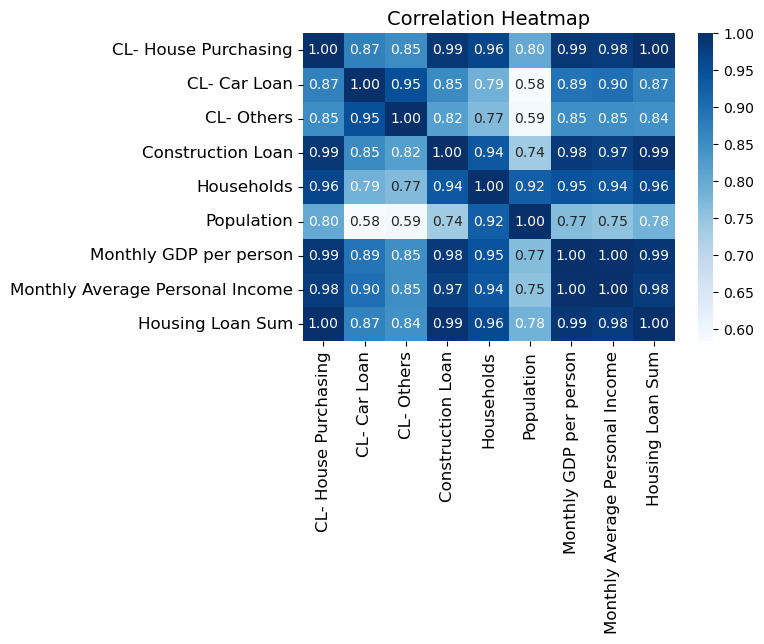

In [1097]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(6,4))

numeric_columns = df.select_dtypes(include=np.number).columns

correlation_matrix = df[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

## Households? Population?
<img src="Household News.png" width="600" height="600">

## Households Linear Regression Model

In [333]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [620]:
dflr = df.loc[:,['Households','Housing Loan Sum']]

dflr

,Households,Housing Loan Sum
0,6541419,3111875000000
1,6549023,3104610000000
2,6562307,3103923000000
3,6575670,3124233000000
4,6592549,3130814000000
...,...,...
293,9309862,13913115000000
294,9323985,14001872000000
295,9343388,14160805000000
296,9379019,14303850000000


In [626]:
date_range = pd.date_range(start="2000-01", end="2024-11", freq='M') 
dfd = pd.DataFrame({
    'Date': date_range
})
dfd

,Date
0,2000-01-31
1,2000-02-29
2,2000-03-31
3,2000-04-30
4,2000-05-31
...,...
293,2024-06-30
294,2024-07-31
295,2024-08-31
296,2024-09-30


In [628]:
dft = pd.concat([dfd,dflr], axis = 1)
dft

,Date,Households,Housing Loan Sum
0,2000-01-31,6541419,3111875000000
1,2000-02-29,6549023,3104610000000
2,2000-03-31,6562307,3103923000000
3,2000-04-30,6575670,3124233000000
4,2000-05-31,6592549,3130814000000
...,...,...,...
293,2024-06-30,9309862,13913115000000
294,2024-07-31,9323985,14001872000000
295,2024-08-31,9343388,14160805000000
296,2024-09-30,9379019,14303850000000


In [658]:
A = dft[['Households']]
b = dft['Housing Loan Sum']

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(A_train, b_train)
b_pred = model.predict(A_test)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

print("Mean Squared Error:", mean_squared_error(b_test, b_pred))
print("R² Score:", r2_score(b_test, b_pred))

Intercept: -22068032799582.85
Coefficients: [3631051.94426256]
Mean Squared Error: 6.057178623326526e+23
R² Score: 0.9218395804295265


In [660]:
W = model.coef_
B = model.intercept_

In [749]:
lnrgmodel =  W*A + B 

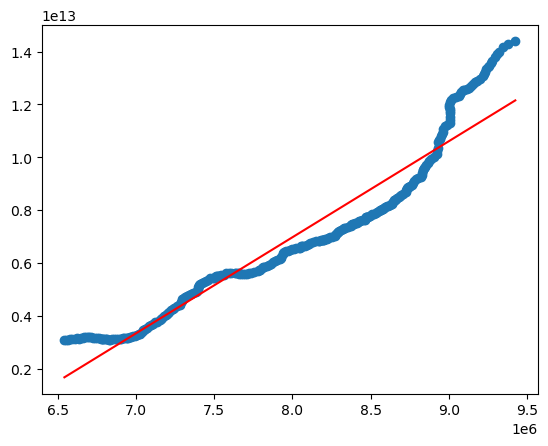

In [751]:
plt.scatter(A,b)
plt.plot(A, lnrgmodel , 'r')
plt.show()

In [741]:
results = pd.DataFrame({'Actual': b_test, 'Predicted': b_pred})
results

,Actual,Predicted
159,6898879000000,7.745976e+12
264,11770175000000,1.063232e+13
254,10790767000000,1.043184e+13
9,3185432000000,2.115692e+12
77,4812034000000,4.575297e+12
234,9164502000000,9.845116e+12
93,5446269000000,5.155950e+12
109,5590827000000,5.782470e+12
5,3144658000000,1.933279e+12
172,7279213000000,8.144810e+12


In [894]:
dft_lrpredict = dft['Households'].apply(lambda x: W * x + B )
dft_lrpredict = pd.DataFrame({'Date':date_range,'Predicted Housing Loan Sum':dft_lrpredict})
dft_lrpredict

,Date,Predicted Housing Loan Sum
0,2000-01-31,[1684199378603.1836]
1,2000-02-29,[1711809897587.3555]
2,2000-03-31,[1760044791614.9414]
3,2000-04-30,[1808566538746.121]
4,2000-05-31,[1869855064513.3281]
...,...,...
293,2024-06-30,[11736559716333.254]
294,2024-07-31,[11787841062942.07]
295,2024-08-31,[11858294363816.598]
296,2024-09-30,[11987672375642.617]


## Population Linear Regression Model

In [1061]:
data = pd.read_csv('LSTM Data Set.csv')
data

,Date,Population,Households,Housing Loan Sum
0,2000-01-31,22106240,6541419,3111875000000
1,2000-02-29,22119943,6549023,3104610000000
2,2000-03-31,22134777,6562307,3103923000000
3,2000-04-30,22146733,6575670,3124233000000
4,2000-05-31,22159658,6592549,3130814000000
...,...,...,...,...
293,2024-06-30,23412899,9309862,13913115000000
294,2024-07-31,23409323,9323985,14001872000000
295,2024-08-31,23406608,9343388,14160805000000
296,2024-09-30,23404138,9379019,14303850000000


In [1077]:
C = data[['Population']]
d = data['Housing Loan Sum']

C_train, C_test, d_train, d_test = train_test_split(C, d, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(C_train, d_train)
d_pred = model.predict(C_test)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

print("Mean Squared Error:", mean_squared_error(d_test, d_pred))
print("R² Score:", r2_score(d_test, d_pred))

Intercept: -124394181990935.89
Coefficients: [5689098.87131079]
Mean Squared Error: 2.745285187026327e+24
R² Score: 0.645754805327595


In [1079]:
W2 = model.coef_
B2 = model.intercept_
line_model2 = W2*C + B2

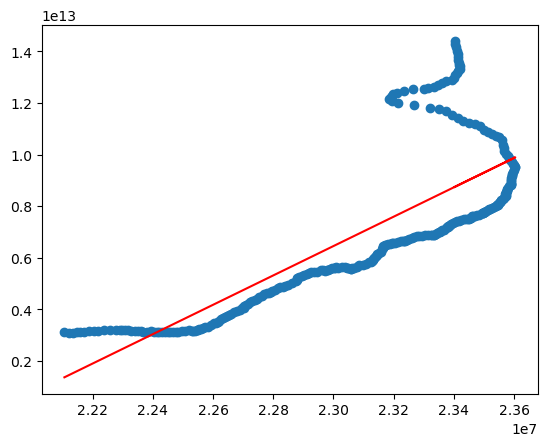

In [1081]:
plt.scatter(C,d)
plt.plot(C, line_model2 , 'r')
plt.show()

In [1083]:
pl_lrpredict = data['Population'].apply(lambda x: W2 * x + B2 )
pl_lrpredict = pd.DataFrame({'Date':date_range,'Population Predicted Housing Loan Sum':pl_lrpredict})
pl_lrpredict

,Date,Population Predicted Housing Loan Sum
0,2000-01-31,[1370403041989.5312]
1,2000-02-29,[1448360763823.0938]
2,2000-03-31,[1532752856480.125]
3,2000-04-30,[1600771722585.5156]
4,2000-05-31,[1674303325497.2031]
...,...,...
293,2024-06-30,[8804115284077.61]
294,2024-07-31,[8783771066513.8125]
295,2024-08-31,[8768325163078.203]
296,2024-09-30,[8754273088866.0625]


## Total Bank Deposit Stats
<img src="no worries news.png" width="800" height="600">

In [721]:
tdp = pd.read_csv('2000 Total Deposit.csv')

tdp

,Total Deposit
0,182688.0
1,183669.0
2,185259.0
3,185052.0
4,184089.0
...,...
293,618616.0
294,620536.0
295,618579.0
296,618212.0


In [723]:
tdp = tdp[['Total Deposit']] * 100000000

In [725]:
tdp

,Total Deposit
0,1.826880e+13
1,1.836690e+13
2,1.852590e+13
3,1.850520e+13
4,1.840890e+13
...,...
293,6.186160e+13
294,6.205360e+13
295,6.185790e+13
296,6.182120e+13


In [727]:
tdpcap = tdp *0.3

In [729]:
tdpcap

,Total Deposit
0,5.480640e+12
1,5.510070e+12
2,5.557770e+12
3,5.551560e+12
4,5.522670e+12
...,...
293,1.855848e+13
294,1.861608e+13
295,1.855737e+13
296,1.854636e+13


In [731]:
tdpcap.columns = ['Total Deposit Cap']
tdpcap

,Total Deposit Cap
0,5.480640e+12
1,5.510070e+12
2,5.557770e+12
3,5.551560e+12
4,5.522670e+12
...,...
293,1.855848e+13
294,1.861608e+13
295,1.855737e+13
296,1.854636e+13


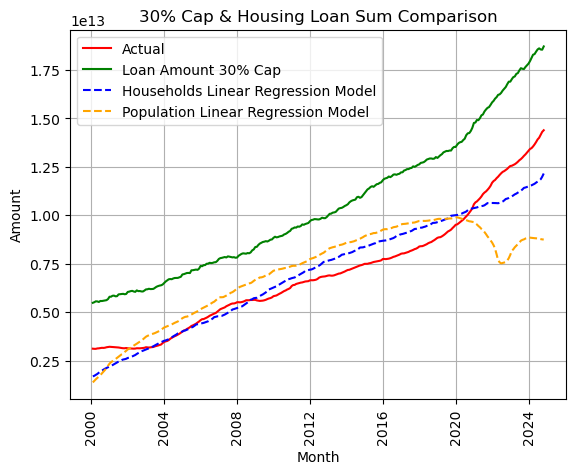

In [1103]:
plt.plot(dft['Date'], data['Housing Loan Sum'], label="Actual", color='red')
plt.plot(dft['Date'], tdpcap['Total Deposit Cap'], label="Loan Amount 30% Cap", color='green')
plt.plot(dft['Date'], dft_lrpredict['Predicted Housing Loan Sum'], label="Households Linear Regression Model", color = 'blue', linestyle='--')
plt.plot(dft['Date'], pl_lrpredict['Population Predicted Housing Loan Sum'], label="Population Linear Regression Model", color = 'orange', linestyle='--')

plt.title("30% Cap & Housing Loan Sum Comparison")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

plt.show()

## Normalized Household Linear Regression Model

In [358]:
from sklearn.preprocessing import MinMaxScaler

In [786]:
dft.dtypes

Date                          datetime64[ns]
Households                             int64
Housing Loan Sum                       int64
Predicted Housing Loan Sum            object
dtype: object

In [838]:
scaler = MinMaxScaler()
dflr_normalized = pd.DataFrame(scaler.fit_transform(dflr), columns=dflr.columns)
dflr_normalized 

,Households,Housing Loan Sum
0,0.000000,0.000705
1,0.002637,0.000061
2,0.007244,0.000000
3,0.011878,0.001800
4,0.017731,0.002383
...,...,...
293,0.960045,0.957841
294,0.964942,0.965706
295,0.971671,0.979790
296,0.984027,0.992466


In [902]:
X = dflr_normalized[['Households']]
y = dflr_normalized['Housing Loan Sum']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Intercept: -0.12580681539544308
Coefficients: [0.92784841]
Mean Squared Error: 0.004756320403108304
R² Score: 0.9218395804295265


# LSTM Model Predicting Loan Values Based on Household as a Feature

In [556]:
pip install keras 


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 10.3 MB/s eta 0:00:00


In [560]:
pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.6/390.3 MB 10.5 MB/s eta 0:00:38
   - -------------------------------------- 10.2/390.3 MB 30.3 MB/s eta 0:00:13
   - -------------------------------------- 17.3/390.3 MB 31.2 MB/s eta 0:00:12
   -- ------------------------------------- 24.6/390.3 MB 31.2 MB/s eta 0:00:12
   ---- ----------------------------------- 40.1/390.3 MB 40.5 MB/s eta 0:00:09
   ----- ---------------------------------- 55.3/390.3 MB 45.7 MB/s eta 0:00:08
   ------- -------------------------------- 70.8/390.3 MB 49.6 MB/s eta 0:00:07
   -------- ------------------------------- 86.5/390.3 MB 52.6 MB/s eta 0:00:06
   --------- ------------------------------ 96.7/390.3 MB 52.3 MB/s eta 0:00:06
   ----------- --------------------------- 112.7/390.3 MB 54.5 MB/s eta 0:00:06
   ------------ -------------------------- 129.0/390.3 MB 56.4 MB/s eta 0:00:05
   -------------- ------------------------ 145.2/3

In [1139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [1249]:
df = dft

In [1251]:
df.set_index('Date', inplace=True)

In [1253]:
df

,Households,Housing Loan Sum
Date,,
2000-01-31,6541419,3111875000000
2000-02-29,6549023,3104610000000
2000-03-31,6562307,3103923000000
2000-04-30,6575670,3124233000000
2000-05-31,6592549,3130814000000
...,...,...
2024-06-30,9309862,13913115000000
2024-07-31,9323985,14001872000000
2024-08-31,9343388,14160805000000


In [1380]:
features = df[['Households']].values
target = df['Housing Loan Sum'].values.reshape(-1, 1)

scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

features_scaled = scaler_features.fit_transform(features)
target_scaled = scaler_target.fit_transform(target)

def create_sequences(features, target, time_steps):
    X, y = [], []
    for i in range(len(features) - time_steps):
        X.append(features[i:i + time_steps])
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 2
X, y = create_sequences(features_scaled, target_scaled, time_steps)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    LSTM(50, return_sequences=True, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    LSTM(30, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')


history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=1, verbose=1)


y_pred_scaled = model.predict(X_test)
y_pred = scaler_target.inverse_transform(y_pred_scaled)
y_test_original = scaler_target.inverse_transform(y_test)

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1090 - val_loss: 0.0130
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071 - val_loss: 0.0060
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 9/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 10/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - val_loss: 9.7651e-04
Epoch 11/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 12/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [1382]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
mae = mean_absolute_error(y_test_original, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")

Test RMSE: 134894465081.35
Test MAE: 100235066507.73


In [1384]:
mean_target = np.mean(y_test_original)
relative_rmse = (rmse / mean_target) * 100
relative_mae = (mae / mean_target) * 100

print(f"Relative RMSE: {relative_rmse:.2f}%")
print(f"Relative MAE: {relative_mae:.2f}%")

Relative RMSE: 1.97%
Relative MAE: 1.46%


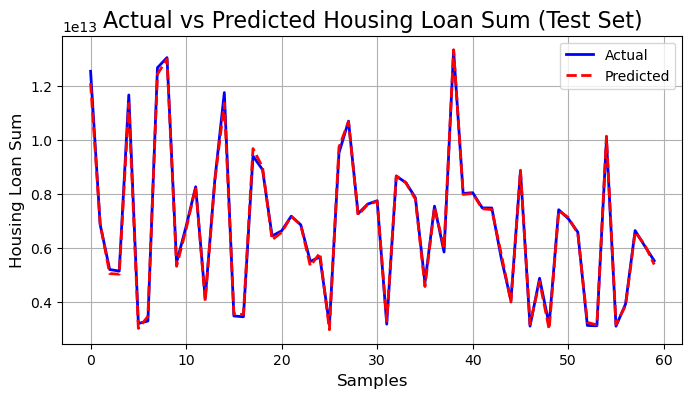

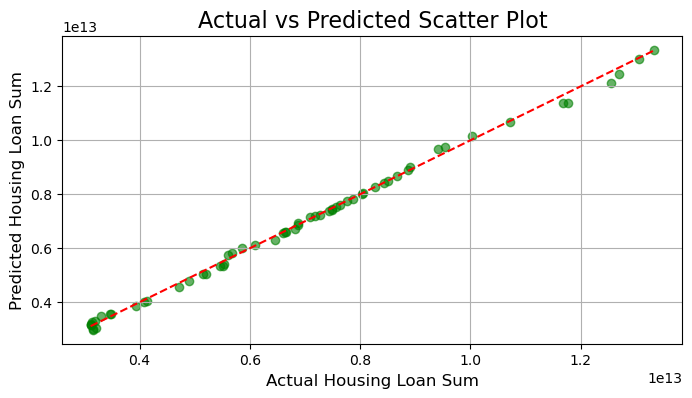

In [1407]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(y_test_original)), y_test_original, label='Actual', color='blue', linewidth=2)
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Housing Loan Sum (Test Set)', fontsize=16)
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Housing Loan Sum', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(y_test_original, y_pred, color='green', alpha=0.6)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--')
plt.title('Actual vs Predicted Scatter Plot', fontsize=16)
plt.xlabel('Actual Housing Loan Sum', fontsize=12)
plt.ylabel('Predicted Housing Loan Sum', fontsize=12)
plt.grid(True)
plt.show()

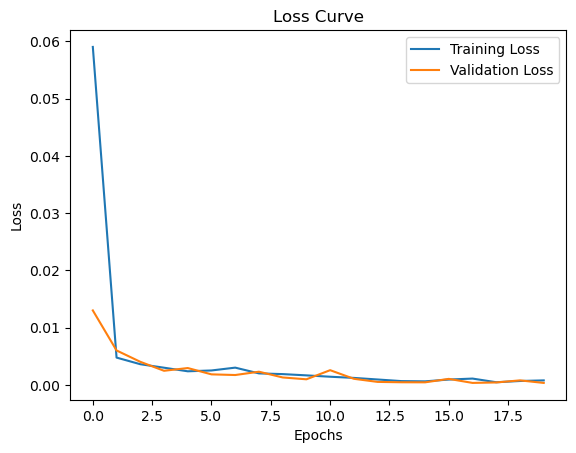

In [1388]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1409]:
new_data_batch = np.array([[9475080]])
for i, new_data in enumerate(new_data_batch):
    new_data_scaled = scaler_features.transform([new_data])
    recent_data_scaled = features_scaled[-(time_steps - 1):]
    new_input_scaled = np.vstack([recent_data_scaled, new_data_scaled])
    new_input_scaled = new_input_scaled.reshape(1, time_steps, -1)
    predicted_scaled = model.predict(new_input_scaled)
    predicted_original = scaler_target.inverse_transform(predicted_scaled)
    print(f"Prediction {i+1}: {predicted_original[0][0]:,.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Prediction 1: 15,170,003,795,968.00


<img src="Household News.png" width="600" height="600">

## Conclusion
<img src="News Article.png" width="800" height="600">

In [1396]:
15170003795968 - 14388873000000

781130795968